## Clustering
### Dengan Ionosphere Dataset

##### Oleh : Zalid Qomalita Hijriana
September 14, 2019

https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/

In [152]:
#Skenario:

#1. Split dataset (train:test = 90:10) 
#2. Memilih satu algoritma dari setiap kategori algoritma clustering. Pada tugas ini dipilih algoritma K-means, 
#   DBSCAN, Agglomerative, dan Gaussian Mixture Model
#3. Melakukan clustering training data, dan menghitung purity- nya.
#4. Menggunakan test data untuk mendapatkan akurasi dari setiap algoritma clustering. 
#5. Analisis hasil testing.

In [153]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm

#Membaca dataset Training
df =  pd.read_csv('ionosphere.data', names = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10',
                                             'f11','f12','f13','f14','f15','f16','f17','f18','f19','f20',
                                             'f21','f22','f23','f24','f25','f26','f27','f28','f29','f30',
                                             'f31','f32','f33','f34','f35'
                                             ])

### Data Preprocessing

#### 1. Analisis Feature

In [154]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [155]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dataset ionosphere terdiri dari 34 kolom feature dan 1 kolom kelas. Jumlah ini tentunya sangat besar. Oleh karena itu, disini dilakukan preprocessing, dengan melihat dari deskripsi data, apakah ada kemungkinan kolom yang dapat direduksi sebelum masuk pada proses clustering. Berdasarkan deskripsi data, kolom F2 memiliki nilai yang semuanya adalah 0, maka kolom ini bisa diabaikan. Serta pada kolom F1, hampir semua data bernilai 1, maka asumsi kolom ini juga dapat diabaikan. 

In [156]:
data = df.iloc[:,2:35]

In [157]:
data['f35'].value_counts()

g    225
b    126
Name: f35, dtype: int64

Dataset ini cukup balance, sehingga tidak perlu dilakukan oversampling.

#### 2. Label Encoding 
Untuk label kelas radar g = 0, b = 1

In [158]:
data['f35'] = data['f35'].map({'b':0,'g':1})

In [159]:
#Memisahkan x dan y
xd = data[['f3','f4','f5','f6','f7','f8','f9','f10',
           'f11','f12','f13','f14','f15','f16','f17','f18','f19','f20',
           'f21','f22','f23','f24','f25','f26','f27','f28','f29','f30',
           'f31','f32','f33','f34']]
yd = data[['f35']]

#### 3. Split Data

Split data training : testing = 90 : 10

In [160]:
from sklearn.model_selection import train_test_split
x, xtest, y, ytest = train_test_split(xd,yd,test_size=0.1,random_state=1)

### Proses Clustering

In [200]:
#Fungsi untuk menghitung nilai Purity
#Semakin besar nilai purity maka cluster semakin bagus.

from sklearn import metrics
def hitung_purity(y,c):
    cm = metrics.cluster.contingency_matrix(y,c)
    jumlahmax = np.sum(np.amax(cm,axis=0))
    return jumlahmax/len(c)

In [162]:
#Distance Matrix antar data

from scipy.spatial import distance_matrix
distance_matrix(x,x)

array([[0.        , 5.02866029, 3.29364755, ..., 3.56058335, 3.27333436,
        4.74778098],
       [5.02866029, 0.        , 6.76531671, ..., 6.8078235 , 6.66890878,
        6.164414  ],
       [3.29364755, 6.76531671, 0.        , ..., 4.98403624, 2.58805721,
        6.53714541],
       ...,
       [3.56058335, 6.8078235 , 4.98403624, ..., 0.        , 4.03213784,
        5.21797286],
       [3.27333436, 6.66890878, 2.58805721, ..., 4.03213784, 0.        ,
        5.7339205 ],
       [4.74778098, 6.164414  , 6.53714541, ..., 5.21797286, 5.7339205 ,
        0.        ]])

#### 1. K-Means

In [201]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, init='random').fit(x)
c = kmeans.labels_

In [202]:
kmeansPurity = hitung_purity(y,c)
print('Purity pada K-Means :',kmeansPurity)

Purity pada K-Means : 0.7047619047619048


#### 2. DBSCAN

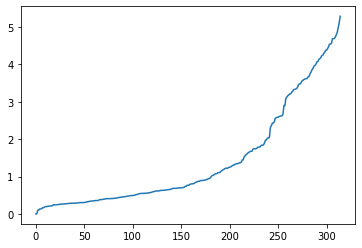

In [165]:
#Mencari nilai epsilon yang optimal
#Dengan menghitung jarak ke n point terdekat untuk masing-masing point.
#Optimum epsilon => titik pada maximum curvature

from sklearn.neighbors import NearestNeighbors

neight = NearestNeighbors(n_neighbors=2)
nbrs=neight.fit(x)

distance, indices = nbrs.kneighbors(x)
distance = np.sort(distance,axis = 0)
distance = distance[:,1]
plt.plot(distance)

Berdasarkan kurva tersebut, maka epsilon yang optimal ada pada nilai 1.5

In [203]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(x)

In [167]:
dbscanPurity = hitung_purity(y,dbscan.labels_)
print('Purity pada DBSCAN :',dbscanPurity)

Purity pada DBSCAN : 0.9079365079365079


#### 3. Agglomerative

In [168]:
from sklearn.cluster import AgglomerativeClustering
Aglo = AgglomerativeClustering(affinity='euclidean',
                        linkage='complete',n_clusters=2,
                        pooling_func='deprecated').fit(x)
Aglo.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [169]:
agloPurity = hitung_purity(y,Aglo.labels_)
print('Purity pada Agglomerative :',agloPurity)

Purity pada Agglomerative : 0.7555555555555555


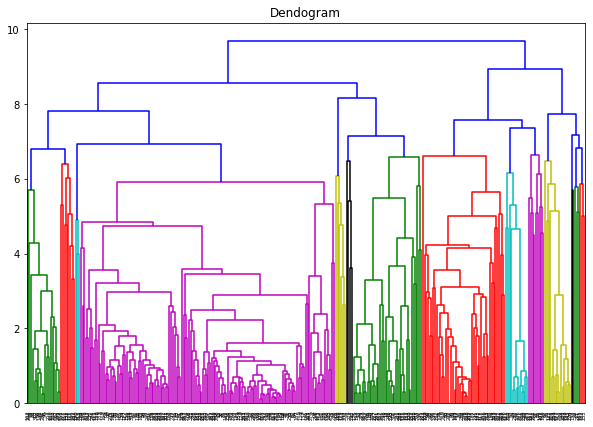

In [170]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(x, method='complete'))

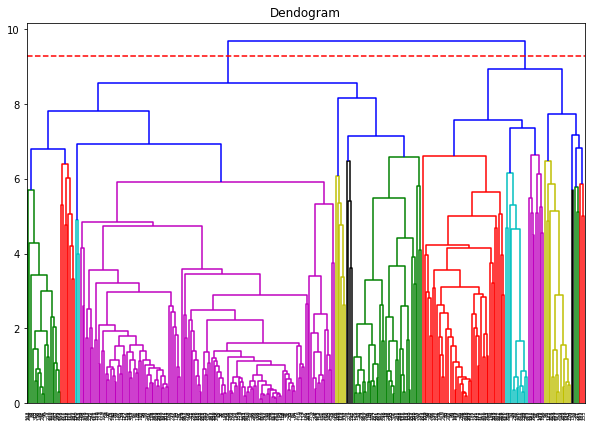

In [171]:
# threshold distance
plt.figure(figsize=(10,7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(x, method='complete'))
plt.axhline(y=9.3,color = 'r',linestyle = '--')

#### 4. Gaussian Mixture Model

In [182]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(x)
labelgm = model.predict(x)

In [183]:
gmPurity = hitung_purity(y,labelgm)
print('Purity pada Gaussian Mixture :',gmPurity)

Purity pada Gaussian Mixture : 0.7904761904761904


### Testing

1. Menggunakan Algoritma K-Means

In [174]:
predKmeans = kmeans.predict(xtest) 

akurasiKMEANS = sm.accuracy_score(ytest,predKmeans)
print('Akurasi pada Agglomerative :',akurasiKMEANS)

Akurasi pada Agglomerative : 0.7777777777777778


2. Menggunakan algoritma DBSCAN

In [175]:
import numpy as np
import scipy as sp


def dbscan_predict(dbscan, X_new):
    y_new = np.ones(shape=len(xtest), dtype=int)*-1 
    for j, x_new in enumerate(xtest.values):
        # cari core sample 
        for i, x_core in enumerate(dbscan.components_): 
            matrik = np.linalg.norm(x_new-x_core)
            if matrik < dbscan.eps:
                #label x_new
                y_new[j] = dbscan.labels_[dbscan.core_sample_indices_[i]]
                break

    return y_new

In [176]:
predDBSCAN = dbscan_predict(dbscan, xtest)
#labelling cluster 
pred = np.where(predDBSCAN<0,1,predDBSCAN)

labelclusterDBSCAN = []
for i in pred:
    if i == 1:
        labelclusterDBSCAN.append(0)
    else:
         labelclusterDBSCAN.append(1) 
            
akurasiDBSCAN = sm.accuracy_score(ytest,labelclusterDBSCAN)
print('Akurasi pada DBSCAN :',akurasiDBSCAN)

Akurasi pada DBSCAN : 0.9166666666666666


3. Menggunakan Algoritma Agglomerative

In [254]:
#complete linkage
c1=pd.DataFrame()
c2=pd.DataFrame()
for i in range(Aglo.labels_.shape[0]):
    if Aglo.labels_[i]==0:
        c1 = c1.append(x.iloc[i])
    else:
        c2 = c2.append(x.iloc[i])

from sklearn.metrics import pairwise_distances
dist1 = pairwise_distances(xtest,c1,metric='euclidean')
dist2 = pairwise_distances(xtest,c2,metric='euclidean')

max1 = np.max(dist1,axis=1)
max2 = np.max(dist2,axis=1)
labelAglo = np.zeros(avg1.shape[0])
for j in range(max1.shape[0]):
    if max1[j]<max2[j]:
        labelAglo[j] = 1
    else:
        labelAglo[j]= 0
        
akurasiAglo = sm.accuracy_score(ytest,labelAglo)
print('Akurasi pada Agglomerative :',akurasiAglo)

    

Akurasi pada Agglomerative : 0.75


4. Menggunakan Algoritma Gaussian Mixture

In [194]:
predtestGaussian = model.predict(xtest)

In [195]:
akurasiGM = sm.accuracy_score(ytest,predtestGaussian)
print('Akurasi pada Gaussian Mixture Model :',akurasiGM)

Akurasi pada Gaussian Mixture Model : 0.8611111111111112


### Analisis

In [255]:
print('ALGORITMA            |',' Nilai Purity              |', '  Akurasi')
print('K-MEANS              |','  ',kmeansPurity,'     |','  ',akurasiKMEANS)
print('DBSCAN               |','  ',dbscanPurity,'     |','  ',akurasiDBSCAN)
print('Agglomerative        |','  ',agloPurity,'     |','  ',akurasiAglo)
print('GaussianMixtureModel |','  ',gmPurity,'     |','  ',akurasiGM)

ALGORITMA            |  Nilai Purity              |   Akurasi
K-MEANS              |    0.7047619047619048      |    0.7777777777777778
DBSCAN               |    0.9079365079365079      |    0.9166666666666666
Agglomerative        |    0.7555555555555555      |    0.75
GaussianMixtureModel |    0.7904761904761904      |    0.8611111111111112


Purity merupakan salah satu ukuran validasi untuk mengetahui kualitas dari suatu cluster. Semakin besar nilai purity, menggambarkan bahwa data tercluster dengan baik. Dari keempat algoritma diatas, nilai purity terbesar didapat dari algoritma DBSCAN yaitu sebesar 0.90. Berdasarkan hasil keempat algoritma tersebut diatas juga dapat diketahui bahwa  nilai purity akan menentukan perkiraan bagus tidaknya nilai akurasi pada test data. Jika pada training diperoleh nilai purity besar, yang berarti diperoleh kualitas kluster yang baik, maka jika ada data baru (data testing), data tersebut juga akan tercluster dan terlabeli dengan baik.

Dengan menggunakan dataset yang sama, dari keempat algoritma tersebut, akurasi tertinggi diperoleh dari algoritma DBSCAN. Pada algoritma DBSCAN, terdapat parameter epsilon dan Minimum point yang dapat dioptimasi lebih jauh, seperti yang telah dilakukan pada percobaan diatas. Hal ini yang kemungkinan menyebabkan algoritma ini lebih unggul dibandingkan dengan algoritma yang lain.